# Sentiment Analysis

## Loading Data & Descriptive Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv("review_train.csv")

In [3]:
test_df = pd.read_csv("review_test.csv")

In [4]:
train_df.columns.difference(test_df.columns)

Index([], dtype='object')

In [5]:
train_df.shape

(14825, 3)

In [6]:
test_df.shape

(3707, 3)

In [7]:
train_df["Source"] = "train"
test_df["Source"] = "test"

In [8]:
train_df.columns

Index(['Text', 'Score', 'Sentiment', 'Source'], dtype='object')

In [9]:
test_df.columns

Index(['Text', 'Score', 'Sentiment', 'Source'], dtype='object')

In [10]:
df = pd.concat([train_df, test_df])

In [11]:
df.shape

(18532, 4)

In [12]:
df.head()

,Text,Score,Sentiment,Source
0,"I got a free sample of these once, and now--we...",5,1,train
1,I used to get this Tea when I lived in Washing...,4,1,train
2,This is my all time favorite 'grab and go' sna...,5,1,train
3,This flavor is very good and unexpected. The ...,4,1,train
4,thrilled to have this assortment as i got the ...,4,1,train


In [13]:
df.tail()

,Text,Score,Sentiment,Source
3702,I always have Powerade in the house - for ever...,5,1,test
3703,I tried this coffee on a half dozen quests thi...,5,1,test
3704,The Neccos were exactly what I expected and fr...,5,1,test
3705,I thought I was doing the right thing by getti...,1,0,test
3706,Cugino's chicken noodle soup is pretty tasty. ...,5,1,test


In [14]:
df.describe()

,Score,Sentiment
count,18532.000000,18532.000000
mean,4.277304,0.843784
std,1.319827,0.363070
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


## EDA

In [15]:
df.Score.value_counts()

5    12795
4     2842
1     1866
2     1029
Name: Score, dtype: int64

In [16]:
df.Sentiment.value_counts()

1    15637
0     2895
Name: Sentiment, dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,18532.0,4.277304,1.319827,1.0,4.0,5.0,5.0,5.0
Sentiment,18532.0,0.843784,0.363070,0.0,1.0,1.0,1.0,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18532 entries, 0 to 3706
Data columns (total 4 columns):
Text         18532 non-null object
Score        18532 non-null int64
Sentiment    18532 non-null int64
Source       18532 non-null object
dtypes: int64(2), object(2)
memory usage: 723.9+ KB


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import seaborn as sns

In [21]:
# plt.figure(figsize=(5,5))
# plt.title("Overall comparision between Positive and Negative sentiments")
# sns.barplot(x=df.Sentiment, y=df['Score'])
# plt.ylabel("Score)")

Text(0.5, 1.0, 'Scores Distribution')

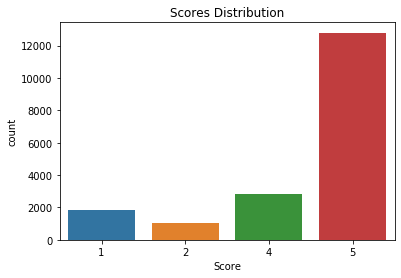

In [22]:
sns.countplot(x='Score', data=df)
plt.title("Scores Distribution")
# sns.barplot(x = df.Score.value_counts().index, y = df.Score.value_counts())

In [23]:
# plt.figure(figsize=(3,5))
# sns.countplot(x='Sentiment', data=df)
# plt.title("Sentiment Distribution")

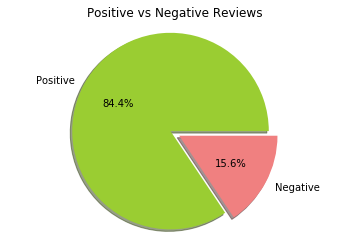

In [24]:
labels = 'Positive', 'Negative'
sizes = df.Sentiment.value_counts()
colors = ['yellowgreen', 'lightcoral']
explode = (0, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title("Positive vs Negative Reviews")

plt.axis('equal')
plt.show()

In [25]:
corr = df.corr()
print(corr)

              Score  Sentiment
Score      1.000000   0.952582
Sentiment  0.952582   1.000000


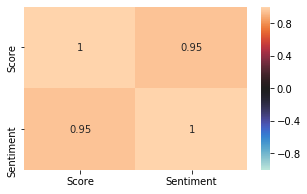

In [26]:
plt.figure(figsize=(5,3))
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

## Data Preprocessing

In [27]:
df.isna().sum()

Text         0
Score        0
Sentiment    0
Source       0
dtype: int64

In [28]:
df.duplicated().sum()

433

In [29]:
reviews = np.array(df['Text'])
sentiments = np.array(df['Sentiment'])

In [30]:
reviews.size

18532

In [31]:
sentiments.size

18532

## Text Preprocessor

In [39]:
!pip install textsearch
!pip install contractions
!pip install tqdm

  Using cached https://files.pythonhosted.org/packages/42/a8/03407021f9555043de5492a2bd7a35c56cc03c2510092b5ec018cae1bbf1/textsearch-0.0.17-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f4/9f/f0d8e8850e12829eea2e778f1c90e3c53a9a799b7f412082a5d21cd19ae1/pyahocorasick-1.4.0.tar.gz
  Running setup.py clean for pyahocorasick
Failed to build pyahocorasick
  Running setup.py install for pyahocorasick: started
    Running setup.py install for pyahocorasick: finished with status 'error'


  ERROR: Complete output from command 'C:\Users\Alex\Anaconda3\python.exe' -u -c 'import setuptools, tokenize;__file__='"'"'C:\\Users\\Alex\\AppData\\Local\\Temp\\pip-install-8qhmu8s1\\pyahocorasick\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Alex\AppData\Local\Temp\pip-wheel-e4bpjhip' --python-tag cp37:
  ERROR: running bdist_wheel
  running build
  running build_ext
  building 'ahocorasick' extension
  creating build
  creating build\temp.win-amd64-3.7
  creating build\temp.win-amd64-3.7\Release
  C:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\BIN\x86_amd64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -DAHOCORASICK_UNICODE= -IC:\Users\Alex\Anaconda3\include -IC:\Users\Alex\Anaconda3\include "-IC:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\INCLUDE" "-IC:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\ATLMFC\INC

In [33]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [34]:
!pip install spacy
import spacy

In [35]:
!python -m spacy validate


| Loading compatibility table...
[+] Loaded compatibility table

====================== Installed models (spaCy v2.1.8) ======================
[i] spaCy installation: C:\Users\Alex\Anaconda3\lib\site-packages\spacy

TYPE      NAME             MODEL            VERSION      
package   en-core-web-sm   en_core_web_sm   2.1.0     [+]



In [36]:
!python -m spacy download en

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\Alex\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\Alex\Anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


You do not have sufficient privilege to perform this operation.


In [37]:
import re
from bs4 import BeautifulSoup
import unicodedata
import contractions
import spacy

nlp = spacy.load('en')
ps = nltk.porter.PorterStemmer()


def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text


def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


def expand_contractions(text):
    return contractions.fix(text)


def spacy_lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


def simple_stemming(text, stemmer=ps):
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text


def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

ModuleNotFoundError: No module named 'textsearch'

## Using TextBlob

In [ ]:
!pip install textblob

In [ ]:
import textblob

In [ ]:
# Testing just 3 reviews and their sentiments with Predicted Polarity 

for review, sentiment  in zip(reviews[105:108], sentiments[105:108]):
    print("REVIEW: ", review)
    print("SENTIMENT: ", sentiment)
    print('PREDICTED Sentiment polarity:', textblob.TextBlob(review).sentiment.polarity)
    print('-'*120)

## Using AFINN

In [ ]:
!pip install afinn

In [ ]:
from afinn import Afinn

afn = Afinn(emoticons=True)

In [ ]:
# Testing just 3 reviews and their sentiments with AFINN Score

for review, sentiment  in zip(reviews[105:108], sentiments[105:108]):
    print("REVIEW: ", review)
    print("SENTIMENT: ", sentiment)
    print('PREDICTED Sentiment polarity:', afn.score(review))
    print('-'*120)

## Using VADER

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
def analyze_sentiment_vader_lexicon(review, 
                                    threshold=0.1,
                                    verbose=False):    
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 'positive' if agg_score >= threshold\
                                   else 'negative'
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]],
                                        columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                      ['Predicted Sentiment', 'Polarity Score',
                                                                       'Positive', 'Negative', 'Neutral']], 
                                                              codes=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)
    
    return final_sentiment

In [ ]:
# Testing just 3 reviews and their sentiments with AFINN Score

for review, sentiment  in zip(reviews[105:108], sentiments[105:108]):
    print("REVIEW: ", review)
    print("SENTIMENT: ", sentiment)
    pred = analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=True)    
    print('-'*120)